In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [2]:
df = pd.read_csv("Crop_Price_India.csv")
df1= df.copy()

In [3]:
df.drop('arrival_date', axis=1, inplace=True)

In [4]:
df.head()

,state,district,market,commodity,variety,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,110000,130000,120000


In [5]:
df1.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        2238 non-null   object
 1   district     2238 non-null   object
 2   market       2238 non-null   object
 3   commodity    2238 non-null   object
 4   variety      2238 non-null   object
 5   min_price    2238 non-null   int64 
 6   max_price    2238 non-null   int64 
 7   modal_price  2238 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.0+ KB


In [7]:
df['district'].unique()

array(['South Andaman', 'Chittor', 'Kurnool', 'West Godavari', 'Cachar',
       'Darrang', 'Dhubri', 'Jorhat', 'Kamrup', 'Sonitpur', 'Bastar',
       'Kanker', 'Surajpur', 'North Goa', 'Amreli', 'Anand', 'Bharuch',
       'Kachchh', 'Kheda', 'Panchmahals', 'Surat', 'Vadodara(Baroda)',
       'Valsad', 'Ambala', 'Faridabad', 'Gurgaon', 'Kurukshetra', 'Mewat',
       'Panipat', 'Kangra', 'Kullu', 'Badgam', 'Bangalore', 'Kolar',
       'Tumkur', 'Alappuzha', 'Ernakulam', 'Kannur', 'Kasargod', 'Kollam',
       'Kottayam', 'Malappuram', 'Thirssur', 'Thiruvananthapuram',
       'Anupur', 'Badwani', 'Dhar', 'Dindori', 'Jhabua', 'Khandwa',
       'Narsinghpur', 'Sheopur', 'Ahmednagar', 'Buldhana', 'Jalgaon',
       'Kolhapur', 'Nagpur', 'Nanded', 'Nashik', 'Pune', 'Satara',
       'Sholapur', 'Bishnupur', 'Chandel', 'Imphal East', 'Imphal West',
       'Thoubal', 'East Khasi Hills', 'Mokokchung', 'Angul', 'Balasore',
       'Bargarh', 'Dhenkanal', 'Gajapati', 'Ganjam', 'Jharsuguda',
       'Ma

In [8]:
categorical_cols = ['state', 'district', 'market',  'commodity','variety']
for x in categorical_cols:
    print()
    print(x)
    print(df[x].unique())


state
['Andaman and Nicobar' 'Andhra Pradesh' 'Assam' 'Chattisgarh' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Nagaland'
 'Odisha' 'Pondicherry' 'Punjab' 'Rajasthan' 'Tamil Nadu' 'Telangana'
 'Tripura' 'Uttar Pradesh' 'Uttrakhand' 'West Bengal']

district
['South Andaman' 'Chittor' 'Kurnool' 'West Godavari' 'Cachar' 'Darrang'
 'Dhubri' 'Jorhat' 'Kamrup' 'Sonitpur' 'Bastar' 'Kanker' 'Surajpur'
 'North Goa' 'Amreli' 'Anand' 'Bharuch' 'Kachchh' 'Kheda' 'Panchmahals'
 'Surat' 'Vadodara(Baroda)' 'Valsad' 'Ambala' 'Faridabad' 'Gurgaon'
 'Kurukshetra' 'Mewat' 'Panipat' 'Kangra' 'Kullu' 'Badgam' 'Bangalore'
 'Kolar' 'Tumkur' 'Alappuzha' 'Ernakulam' 'Kannur' 'Kasargod' 'Kollam'
 'Kottayam' 'Malappuram' 'Thirssur' 'Thiruvananthapuram' 'Anupur'
 'Badwani' 'Dhar' 'Dindori' 'Jhabua' 'Khandwa' 'Narsinghpur' 'Sheopur'
 'Ahmednagar' 'Buldhana' 'Jalgaon' 'Kolhapur' 'Nagpur' 'Nanded' 'Nashik'
 'Pune' 'Sat

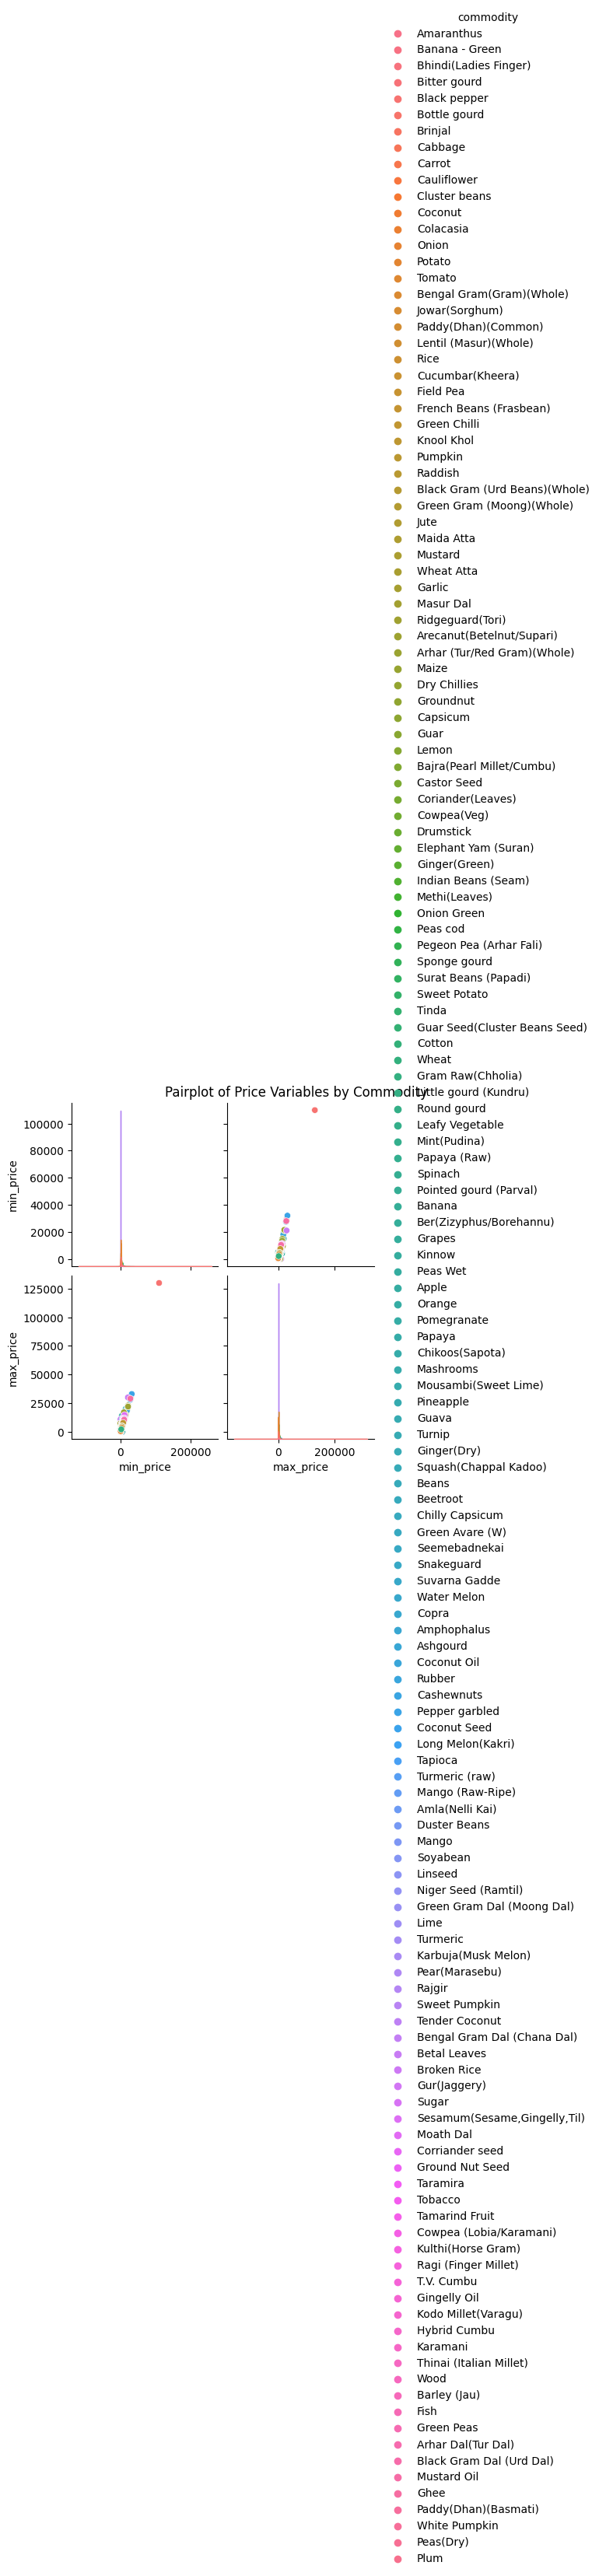

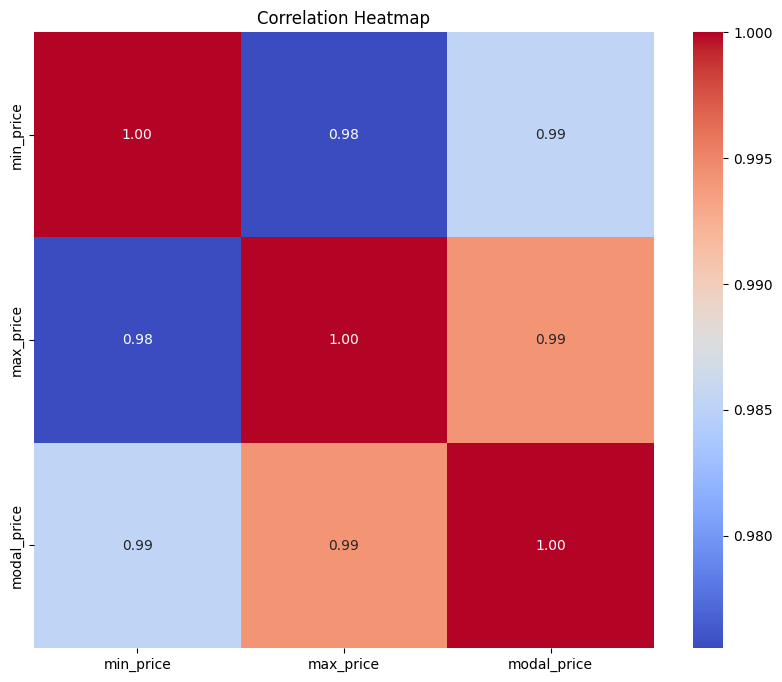

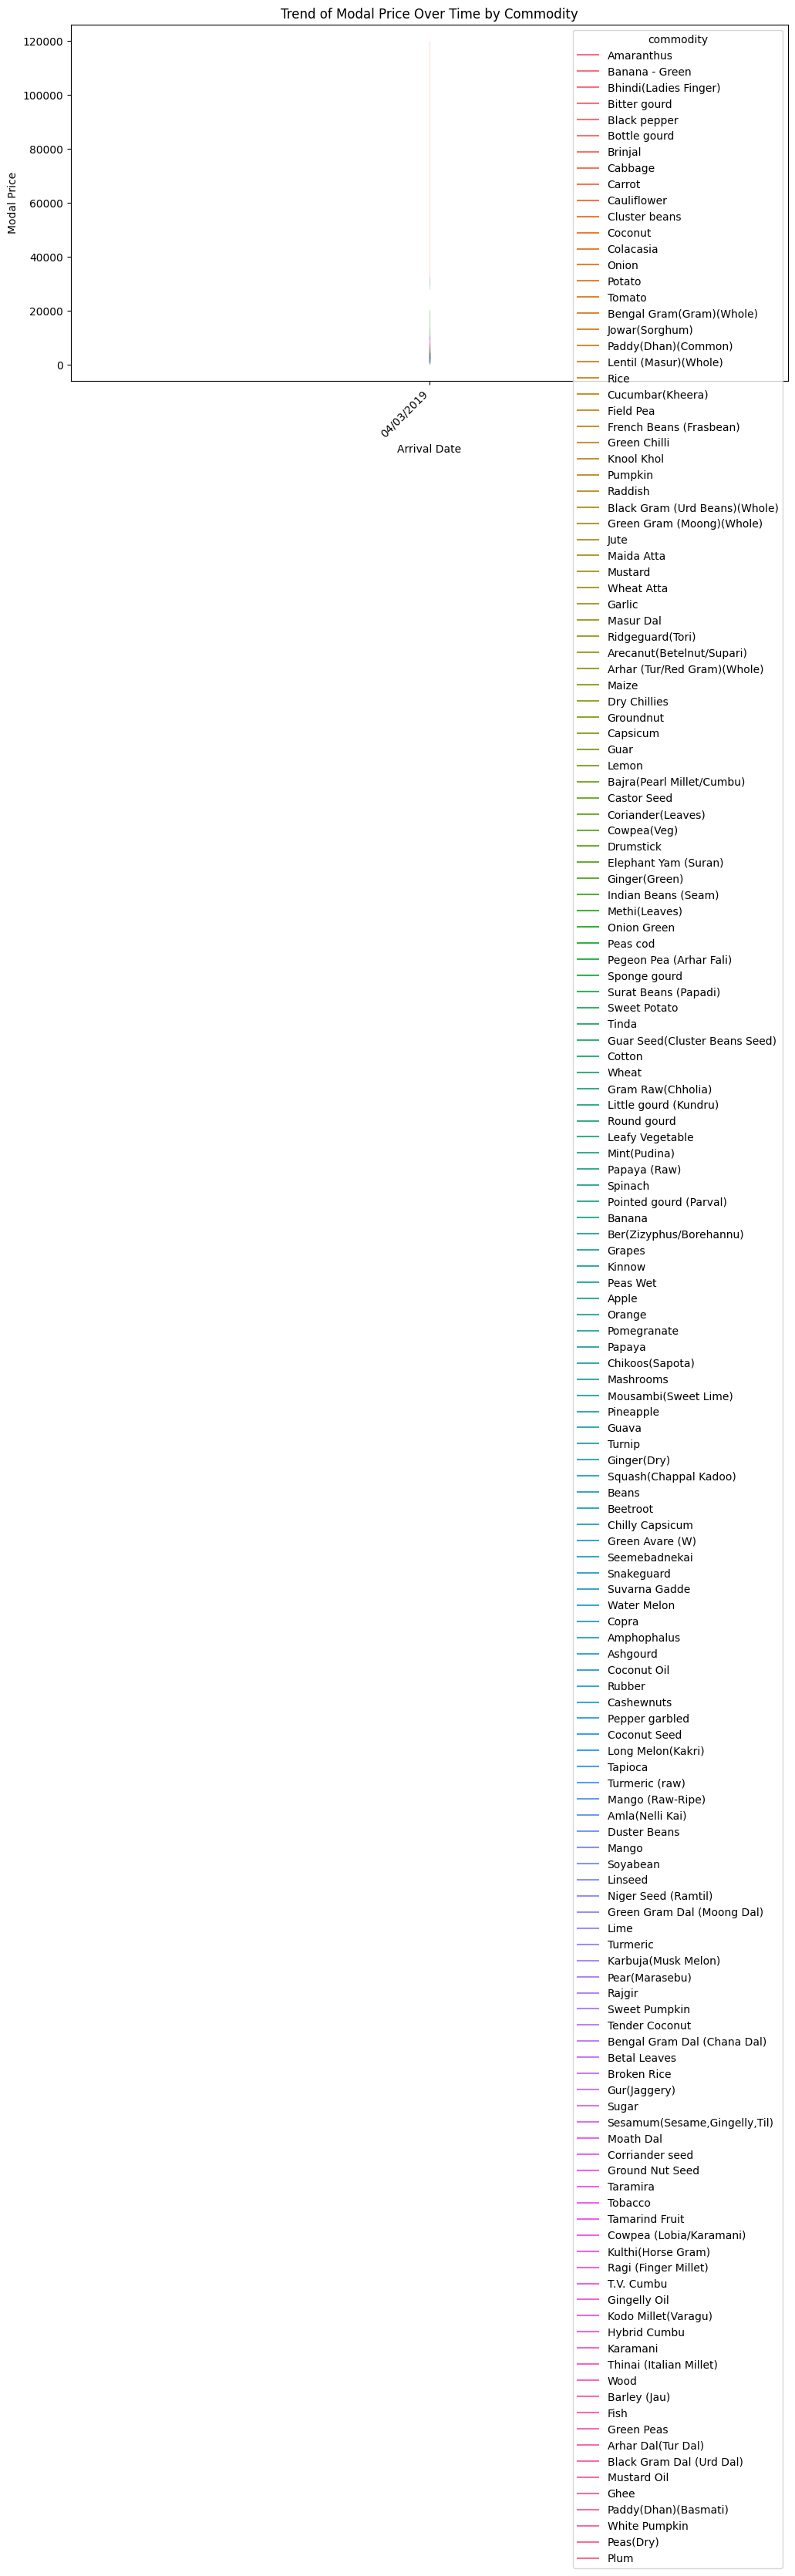

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df1, vars=['min_price', 'max_price'], hue='commodity')
plt.suptitle('Pairplot of Price Variables by Commodity', y=1.02)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df1[['min_price', 'max_price', 'modal_price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date', y='modal_price', data=df1, hue='commodity')
plt.title('Trend of Modal Price Over Time by Commodity')
plt.xlabel('Arrival Date')
plt.ylabel('Modal Price')
plt.xticks(rotation=45, ha='right')
plt.show()


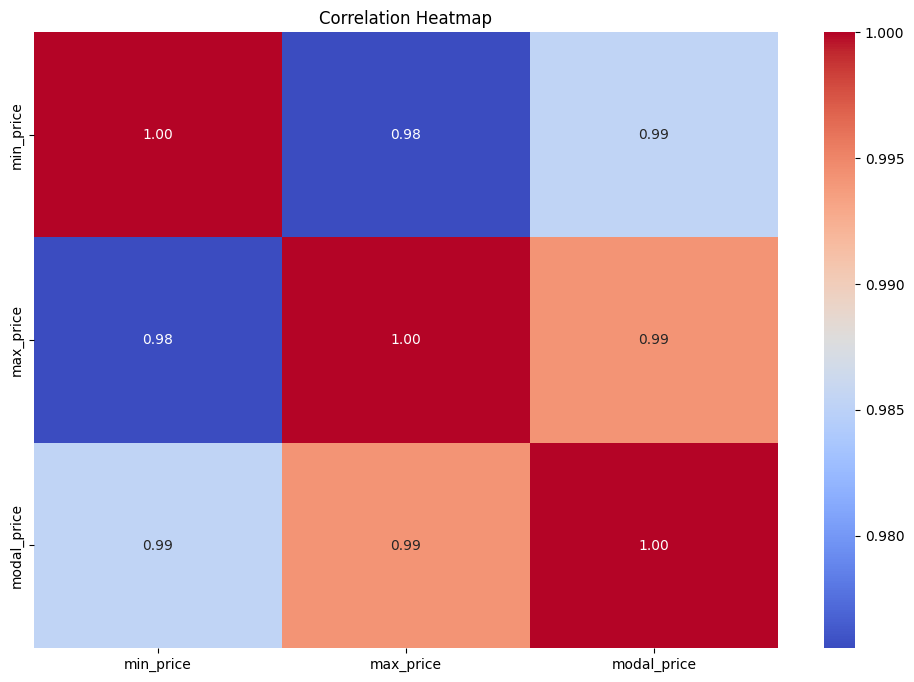

In [217]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
X = df.drop(columns=['modal_price'])
y = df['modal_price']


In [11]:
from sklearn.preprocessing import LabelEncoder
import joblib

for col in categorical_cols:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])
    
    # Save each LabelEncoder separately
    joblib.dump(label_encoder, f"label_encoders_{col}.pkl")

In [12]:
num_cols = ['min_price', 'max_price']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [13]:
X.head()

,state,district,market,commodity,variety,min_price,max_price
0,0,153,246,0,17,1.026666,1.313487
1,0,153,246,10,30,0.592101,0.675142
2,0,153,246,18,39,1.026666,1.313487
3,0,153,246,19,148,1.026666,1.313487
4,0,153,246,22,148,31.156517,32.464733


In [14]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(1790, 7)

In [252]:

svr_rbf = SVR(kernel='rbf')
svr_poly = SVR(kernel='poly')

svr_rbf.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)

SVR(kernel='poly')

In [253]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))  # Adjust input shape
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [17]:
from keras.layers import LSTM, Dense, Dropout

In [18]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, activation='sigmoid', return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32, activation='relu', return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 7, 256)           133120    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 7, 256)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 7, 128)           164352    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 128)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                        

In [19]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [20]:
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=0)

In [21]:
model.fit(X_train_rnn, y_train, epochs=50, batch_size=40, verbose=0)

In [22]:
model.fit(X_train_rnn, y_train, epochs=50, batch_size=22, verbose=0)

In [23]:
model.fit(X_train_rnn, y_train, epochs=50, batch_size=32)

Epoch 1/50


56/56 [==============================] - 1s 20ms/step - loss: 305233.7812
Epoch 2/50
56/56 [==============================] - 1s 21ms/step - loss: 370297.1250
Epoch 3/50
56/56 [==============================] - 1s 19ms/step - loss: 443333.6562
Epoch 4/50
56/56 [==============================] - 1s 19ms/step - loss: 747930.3750
Epoch 5/50
56/56 [==============================] - 1s 20ms/step - loss: 869149.0625
Epoch 6/50
56/56 [==============================] - 1s 19ms/step - loss: 398383.6562
Epoch 7/50
56/56 [==============================] - 1s 19ms/step - loss: 326683.5312
Epoch 8/50
56/56 [==============================] - 1s 20ms/step - loss: 941091.5625
Epoch 9/50
56/56 [==============================] - 1s 26ms/step - loss: 726286.6875
Epoch 10/50
56/56 [==============================] - 1s 19ms/step - loss: 554103.5000
Epoch 11/50
56/56 [==============================] - 1s 20ms/step - loss: 1168556.8750
Epoch 12/50
56/56 [==============================] - 1s 19ms/step - loss:

In [25]:
# svr_rbf_pred = svr_rbf.predict(X_test)
# svr_poly_pred = svr_poly.predict(X_test)
rnn_pred = model.predict(X_test_rnn)

14/14 [==============================] - 1s 5ms/step


In [26]:
# svr_rbf_mse = mean_squared_error(y_test, svr_rbf_pred)
# svr_poly_mse = mean_squared_error(y_test, svr_poly_pred)
rnn_mse = mean_squared_error(y_test, rnn_pred)
# print("SVR RBF MSE:", svr_rbf_mse)
# print("SVR Polynomial MSE:", svr_poly_mse)
print("RNN MSE:", rnn_mse)

RNN MSE: 142525.63579578119


In [264]:
# Save the model
model.save("complex_bidirectional_lstm_model.h5")

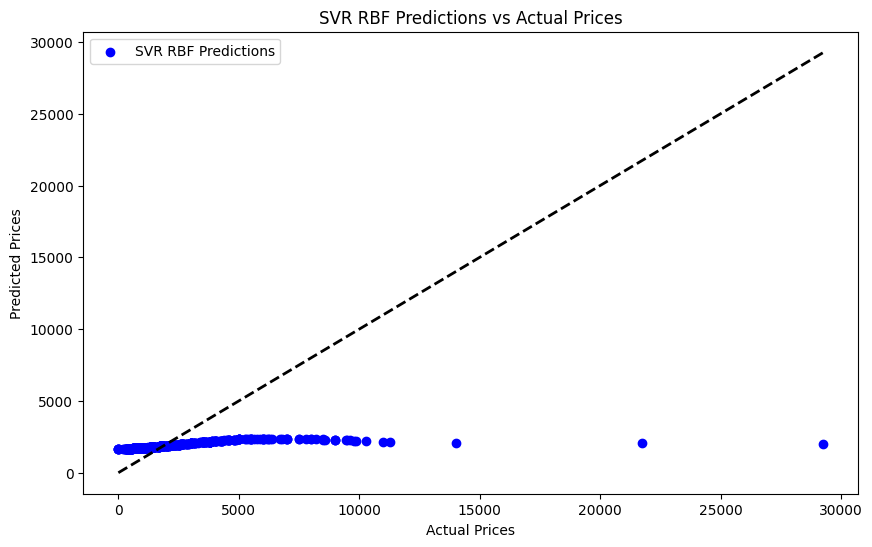

In [265]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_rbf_pred, color='blue', label='SVR RBF Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR RBF Predictions vs Actual Prices')
plt.legend()
plt.show()

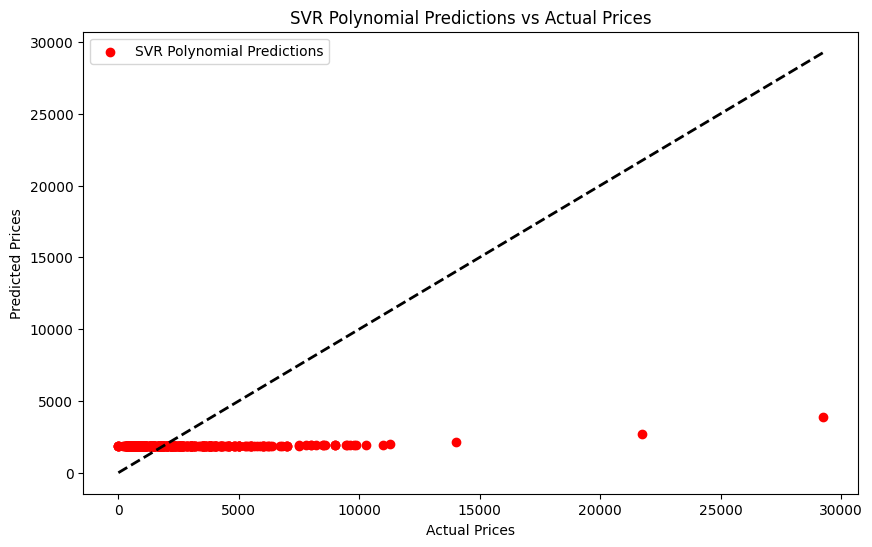

In [266]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_poly_pred, color='red', label='SVR Polynomial Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR Polynomial Predictions vs Actual Prices')
plt.legend()
plt.show()

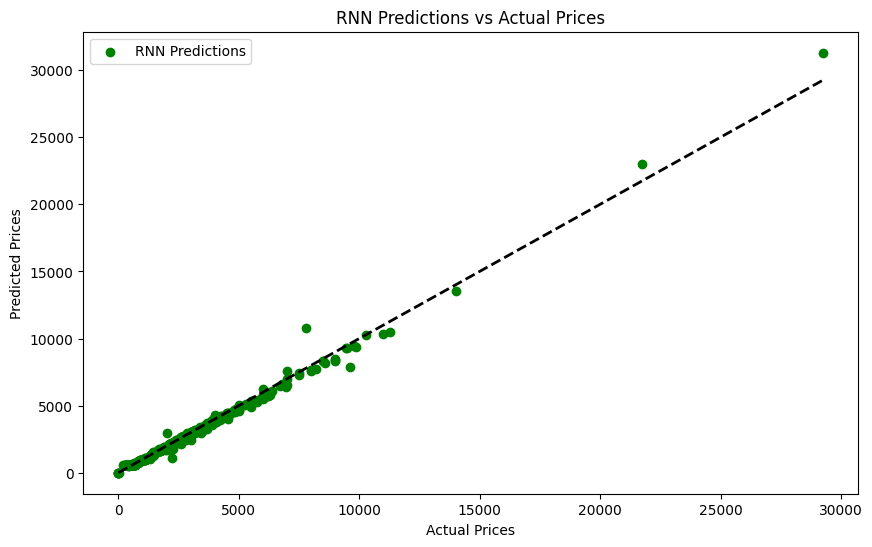

In [267]:
# Plot RNN predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rnn_pred, color='green', label='RNN Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('RNN Predictions vs Actual Prices')
plt.legend()
plt.show()

In [238]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [239]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

ada_boost_model = AdaBoostRegressor(n_estimators=50, random_state=42)
ada_boost_model.fit(X_train, y_train)

xgboost_model = XGBRegressor(n_estimators=100, random_state=42)
xgboost_model.fit(X_train, y_train)

linear_reg_preds = linear_reg_model.predict(X_test)
ada_boost_preds = ada_boost_model.predict(X_test)
xgboost_preds = xgboost_model.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
ada_boost_mse = mean_squared_error(y_test, ada_boost_preds)
xgboost_mse = mean_squared_error(y_test, xgboost_preds)

print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("AdaBoost Mean Squared Error:", ada_boost_mse)
print("XGBoost Mean Squared Error:", xgboost_mse)

Linear Regression Mean Squared Error: 66358.66328386204
AdaBoost Mean Squared Error: 476134.81172119686
XGBoost Mean Squared Error: 92027.14158261268


In [240]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Create and fit Ridge regression model
ridge_reg = Lasso(alpha=3.45)  
ridge_reg.fit(X_train, y_train)

# Make predictions
y_pred = ridge_reg.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 66377.88946365644


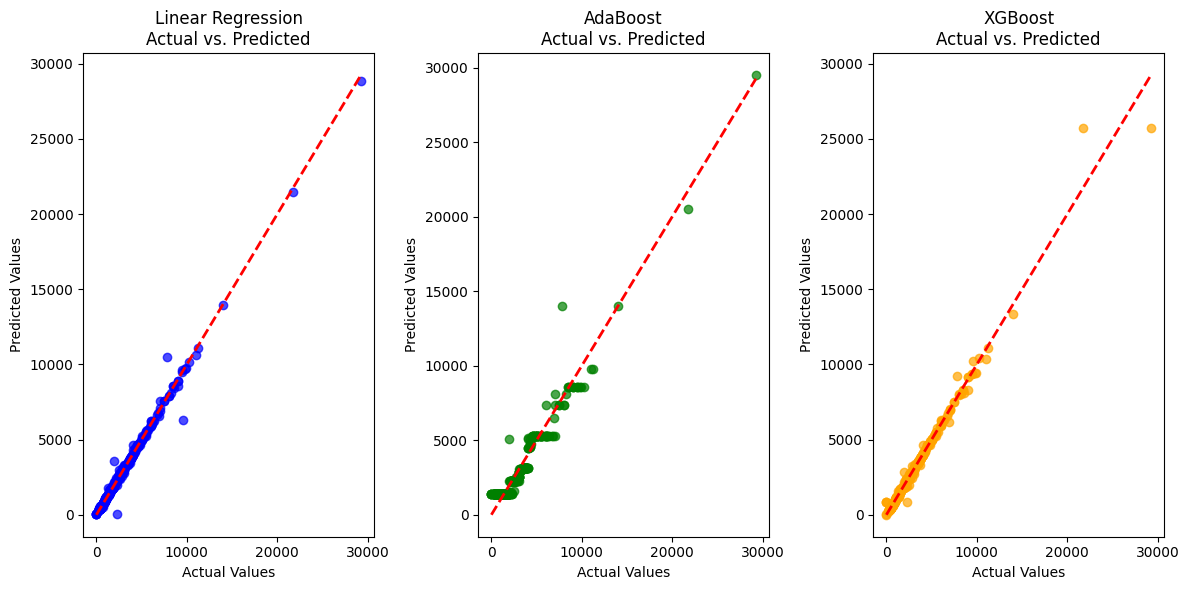

In [241]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_reg_preds, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Linear Regression\nActual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 3, 2)
plt.scatter(y_test, ada_boost_preds, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('AdaBoost\nActual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 3, 3)
plt.scatter(y_test, xgboost_preds, color='orange', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('XGBoost\nActual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()
